## [과제 ] 고객 구매데이터 생성(id, 성별, 연령, 지역, 상품, 가격, 구매시간) 하고 데이터 프레임으로 변환한 후 아래 사항을 수행하세요.

#### 구매 데이터 생성
- id : 1번 ~ 10000번 일련번호(관측치 10000개)
- gender : 0,1 정수 난수 생성
- age : 10 ~ 90사이 정수 난수를 생성
- region : 1 ~ 10 사이 정수 난수 생성
- pdt_22, pdt_23 : 5개 제품 코드 (11 ~ 55)
- pa_22, pa_23 : 1000 ~ 50000 사이 난수 생성
- q_22, q_23 : 1 ~ 100 사이 난수 생성
- t_22, t_23 : 01 ~ 24 사이 정수 난수 생성('가장 자주 구매한 시간대)
- channel : 구매한 매장 유형(1 ~ 5) 5개 정수 난수 생성
- tr_y : 고객의 구매 이력(누적연수 1 ~ 10)
- 구매액은 price * qty로 산출('19년, '20년 각각 계산)하여 pur_19, pur_20 컬럼으로 생성 
- sales: 구매액 증감을 1, 감소를 0으로 표기
- np.nan으로 각 컬럼별로 10개씩 null값을 삽입하고 각 칼럼의 특성을 고려한 null 값 처리

#### 인사이트 도출
- 통계적 분석 및 시각화하여 탐색한 후 불필요한 컬럼은 삭제하고 필요시 추가 파생변수 생성한 후 분석용 데이터셋을 작성하고 인사이트 3개 이상 도출
- 인사이트 도출하지 못한 경우 데이터를 수정하여 다시 탐색한 후 인사이트 도출 및 기술
- 인사이트를 3가지를 만들어 데이터셋에 반영후 그 결과를 확인 

#### 데이터 수정시 참조
- 구매액 증감에 영향을 주는 주요 요인과 관련된 인사이트를 만들 수 있는 데이터로 변경하는 점에 중점을 둠
- 구매 감소한 고객의 특성으로 성별, 지역, 선호제픔, 선호 구매시간대, 평균 구매가 level(저가, 중가, 고가)별로 데이터 수정
- 연령, 성별로 상품유형, 구매단가, 구매시간대 등을 복합적으로 그룹화하여 데이터 특성 부여
- 연도별로 상기한 사항들의 변동과 구매 감소간의 상관성을 부여하는 데이터 수정
- 데이터 수정은 불린 인덱싱으로 특정 그룹을 선택한 후 고객 특성에 맞는 값으로 변경

In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt


warnings.filterwarnings('ignore')

prd = {11 : 2000, 22 : 3000, 33 : 4000, 44 : 5000, 55 : 6000} # 제품 번호와 제품 가격
mar = {1 : '인터넷', 2 : '올리브영', 3 : '전문점', 4 : '백화점', 5 : '면세점'}

np.random.seed(0)

ar = np.zeros((10000, 17), dtype = int)

ar[:, 0] = list(range(1, 10001)) # id


ar[:, 1] = np.random.choice([0, 1], size = 10000) # 성별


ar[:, 2] = np.random.randint(18, 91, size = 10000) # 나이
ar[:, 3] = np.random.randint(1, 11, size = 10000) # 지역 del

ar[:, 4] = np.random.choice(list(prd.keys()), size = 10000) # 22년도 제품
ar[:, 5] = np.random.choice(list(prd.keys()), size = 10000) # 23년도 제품

man_like = np.where(ar[:, 1] == 0)[0]
n_man_11 = int(0.3 * len(man_like))
man_11_like = np.random.choice(man_like, size = n_man_11)
ar[man_11_like, 4] = 11 # prd 딕셔너리의 11 키에 해당하는 제품이 ar[:, 1]의 남성에게 30% 비율로 할당


man_like2 = np.where(ar[:, 1] == 0)[0]
n_man_11 = int(0.1 * len(man_like2))
man_11_like2 = np.random.choice(man_like2, size = n_man_11)
ar[man_11_like2, 5] = 33 # prd 딕셔너리의 11 키에 해당하는 제품이 ar[:, 1]의 남성에게 10% 비율로 할당

woman_like = np.where(ar[:, 1] == 1)[0]
n_woman_22 = int(0.5 * len(woman_like))
woman_22_like = np.random.choice(woman_like, size = n_woman_22)
ar[woman_22_like, 4] = 22 # prd 딕셔너리의 22 키에 해당하는 제품이 ar[:, 1]의 여성에게 50% 비율로 할당


woman_like2 = np.where(ar[:, 1] == 1)[0]
n_woman_33 = int(0.3 * len(woman_like2))
woman_33_like2 = np.random.choice(woman_like2, size = n_woman_33)
ar[woman_33_like2, 5] = 33 # prd 딕셔너리의 33 키에 해당하는 제품이 ar[:, 1]의 여성에게 30% 비율로 할당


ar[:, 6] = np.array([prd[p] for p in ar[:, 4]]) # 22년도 가격
ar[:, 7] = np.array([prd[p] + (3000 if p == 22 else -2000 if p == 33 or p == 44 else 2000) for p in ar[:, 5]]) # 23년도 가격

ar[:, 8] = np.random.randint(1, 101, size = 10000) # 22년도 개수
# ar[:, 9] = np.random.randint(1, 101, size = 10000) # 23년도 개수 아래 코드로 변경
for i in prd.keys():
    pdt_idx = np.where(ar[:, 5] == i)[0] 

    n_pdt_q = int(0.5 * len(pdt_idx)) 
    pdt_sample = np.random.choice(pdt_idx, size=n_pdt_q, replace=False) 

    for j in pdt_sample:
        q_22 = ar[j, 8]

        if i == 44 :
            
            if q_22 + 1 >= 101:
                q_23 = 100
            
            else:
                q_23 = np.random.randint(q_22+1, 101) # 44인 경우 23년도 구매 수량을 22년도 구매 수량보다 크게 설정
        
        else:
            q_23 = np.random.randint(1, q_22+1) # 44가 아닌 경우 23년도 구매 수량을 22년도 구매 수량보다 작게 설정

        ar[j, 9] = q_23 

    pdt2_sample = np.setdiff1d(pdt_idx, pdt_sample) 

    for k in pdt2_sample:
        q_22 = ar[k, 8]

        if i == 33 and np.random.random() <= 0.7:
            q_23 = np.random.randint(1 , 101)
        else:
            q_23 = np.random.randint(1, 101)

        ar[k, 9] = q_23 
        
ar[:, 10] = np.random.randint(1, 25, size = 10000) # 22년도 시간 del
ar[:, 11] = np.random.randint(1, 25, size = 10000) # 23년도 시간 del


ar[:, 12] = np.random.randint(1, 6, size = 10000) # 매장

age_30 = np.where(ar[:, 2] <= 30)[0]
mar1 = int(0.5 * len(age_30))
mar1_30 = np.random.choice(age_30, size = mar1)
ar[mar1_30, 12] = 1

age_40 = np.where((ar[:, 2] > 30) &  (ar[:, 2] <= 40))[0]
mar2 = int(0.5 * len(age_40))
mar2_40 = np.random.choice(age_40, size = mar2)
ar[mar2_40, 12] = 2

age_50 = np.where((ar[:, 2] > 40) &  (ar[:, 2] <= 50))[0]
mar3 = int(0.3 * len(age_50))
mar3_50 = np.random.choice(age_50, size = mar3)
ar[mar3_50, 12] = 3

age_60 = np.where((ar[:, 2] > 50) &  (ar[:, 2] <= 60))[0]
mar4 = int(0.3 * len(age_60))
mar4_60 = np.random.choice(age_60, size = mar1)
ar[mar4_60, 12] = 4

age_el = np.where((ar[:, 2] > 60) &  (ar[:, 2] <= 90))[0]
mar5 = int(0.3 * len(age_el))
mar5_el = np.random.choice(age_el, size = mar5)
ar[mar5_el, 12] = 5



ar[:, 13] = np.random.randint(1, 11, size = 10000) # 구매 이력 del


ar[:, 14] = ar[:, 6] * ar[:, 8] # 22년도 매출
ar[:, 15] = ar[:, 7] * ar[:, 9] # 23년도 매출

ar[:, 16] = np.where((ar[:, 14] < ar[:, 15]), 1, 0) # 매출 증감

df = pd.DataFrame(ar, columns = ('id', 'gender', 'age', 'region', 'pdt_22', 'pdt_23', 'pa_22', 'pa_23',
                              'q_22', 'q_23', 't_22', 't_23', 'channel', 'tr_y','pur_22',
                              'pur_23', 'sales'))

for col in df.columns:
    nan_idx = np.random.choice(df.index, 10, replace=False)
    df.loc[nan_idx, col] = np.nan


df = df.copy()

df.head(10)


,id,gender,age,region,pdt_22,pdt_23,pa_22,pa_23,q_22,q_23,t_22,t_23,channel,tr_y,pur_22,pur_23,sales
0,1.0,0.0,27.0,1.0,55.0,44.0,6000.0,3000.0,33.0,94.0,17.0,12.0,1.0,9.0,198000.0,282000.0,1.0
1,2.0,1.0,53.0,9.0,22.0,33.0,3000.0,2000.0,55.0,36.0,6.0,9.0,4.0,7.0,165000.0,72000.0,0.0
2,3.0,1.0,50.0,8.0,44.0,22.0,5000.0,6000.0,77.0,48.0,19.0,4.0,3.0,10.0,385000.0,288000.0,0.0
3,4.0,0.0,76.0,2.0,22.0,22.0,3000.0,6000.0,17.0,69.0,19.0,1.0,1.0,9.0,51000.0,414000.0,1.0
4,5.0,1.0,44.0,3.0,22.0,44.0,3000.0,3000.0,64.0,70.0,9.0,8.0,3.0,5.0,192000.0,210000.0,1.0
5,6.0,1.0,30.0,4.0,22.0,55.0,3000.0,8000.0,41.0,21.0,8.0,7.0,5.0,7.0,123000.0,168000.0,1.0
6,7.0,1.0,70.0,3.0,22.0,33.0,3000.0,2000.0,25.0,1.0,13.0,22.0,5.0,10.0,75000.0,2000.0,0.0
7,8.0,1.0,75.0,7.0,44.0,11.0,5000.0,4000.0,7.0,7.0,13.0,8.0,5.0,5.0,35000.0,28000.0,0.0
8,9.0,1.0,63.0,6.0,44.0,33.0,5000.0,2000.0,35.0,70.0,23.0,3.0,5.0,9.0,175000.0,140000.0,0.0
9,10.0,1.0,37.0,3.0,55.0,33.0,6000.0,2000.0,64.0,96.0,17.0,6.0,2.0,4.0,384000.0,192000.0,0.0


In [2]:

df.isnull().sum()


id         10
gender     10
age        10
region     10
pdt_22     10
pdt_23     10
pa_22      10
pa_23      10
q_22       10
q_23       10
t_22       10
t_23       10
channel    10
tr_y       10
pur_22     10
pur_23     10
sales      10
dtype: int64

In [3]:
# def recover_pdt_22(row):
    
#     if np.isnan(row['pdt_22']) and not np.isnan(row['pa_22']):
        
#         return row['pa_22']
    
#     elif not np.isnan(row['pdt_22']) and np.isnan(row['pa_22']):
        
#         return row['pdt_22']
    
#     else:
        
#         return row['pdt_22']


# def recover_pdt_23(row):
    
#     if np.isnan(row['pdt_23']) and not np.isnan(row['pa_23']):
        
#         return row['pa_23']
    
#     elif not np.isnan(row['pdt_23']) and np.isnan(row['pa_23']):
        
#         return row['pdt_23']
    
#     else:
        
#         return row['pdt_23']

    

# df['pdt_22'] = df.apply(recover_pdt_22, axis=1)
# df['pa_22'] = df.apply(recover_pdt_22, axis=1)
# df['pdt_23'] = df.apply(recover_pdt_23, axis=1)
# df['pa_23'] = df.apply(recover_pdt_22, axis=1)


In [4]:
df = df.dropna()
df = df.astype(int)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9831 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   id       9831 non-null   int64
 1   gender   9831 non-null   int64
 2   age      9831 non-null   int64
 3   region   9831 non-null   int64
 4   pdt_22   9831 non-null   int64
 5   pdt_23   9831 non-null   int64
 6   pa_22    9831 non-null   int64
 7   pa_23    9831 non-null   int64
 8   q_22     9831 non-null   int64
 9   q_23     9831 non-null   int64
 10  t_22     9831 non-null   int64
 11  t_23     9831 non-null   int64
 12  channel  9831 non-null   int64
 13  tr_y     9831 non-null   int64
 14  pur_22   9831 non-null   int64
 15  pur_23   9831 non-null   int64
 16  sales    9831 non-null   int64
dtypes: int64(17)
memory usage: 1.4 MB


,id,gender,age,region,pdt_22,pdt_23,pa_22,pa_23,q_22,q_23,t_22,t_23,channel,tr_y,pur_22,pur_23,sales
0,1,0,27,1,55,44,6000,3000,33,94,17,12,1,9,198000,282000,1
1,2,1,53,9,22,33,3000,2000,55,36,6,9,4,7,165000,72000,0
2,3,1,50,8,44,22,5000,6000,77,48,19,4,3,10,385000,288000,0
3,4,0,76,2,22,22,3000,6000,17,69,19,1,1,9,51000,414000,1
4,5,1,44,3,22,44,3000,3000,64,70,9,8,3,5,192000,210000,1


In [5]:
# 성별의 따른 제품 선호

df1 = df.gender == 0
print(df[df1].pdt_22.value_counts(), '\n')

df2 = df.gender == 1
print(df[df2].pdt_22.value_counts(), '\n')

df3 = df.age <= 30
print(df[df3].channel.value_counts(), '\n')

df4 = (df.age <= 40) & (df.age > 30)
print(df[df4].channel.value_counts(), '\n')

df5 = (df.age <= 50) & (df.age > 40)
print(df[df5].channel.value_counts(), '\n')

df6 = (df.age <= 60) & (df.age > 50)
print(df[df6].channel.value_counts(), '\n')

df7 = (df.age <= 90) & (df.age > 60)
print(df[df7].channel.value_counts(), '\n')


11    1975
55     727
44     727
33     705
22     703
Name: pdt_22, dtype: int64 

22    2535
55     659
33     616
44     592
11     592
Name: pdt_22, dtype: int64 

1    895
5    230
2    211
3    204
4    190
Name: channel, dtype: int64 

2    690
4    181
1    172
3    154
5    153
Name: channel, dtype: int64 

3    545
4    211
5    206
2    189
1    177
Name: channel, dtype: int64 

4    804
1    147
5    143
3    137
2    127
Name: channel, dtype: int64 

5    1621
1     667
3     617
4     610
2     550
Name: channel, dtype: int64 



In [6]:
# 22년도 와 23 년도 제품 구매 수 (종류 상관없이 총 합)

total_q_22 = np.sum(ar[:, 8])
print(total_q_22)

total_q_23 = np.sum(ar[:, 9])
print(total_q_23)

507105
423594


### 나이대별 선호 구입처 그래프

   id  gender  age  region  pdt_22  pdt_23  pa_22  pa_23  q_22  q_23  t_22  \
0   1       0   27       1      55      44   6000   3000    33    94    17   
1   2       1   53       9      22      33   3000   2000    55    36     6   
2   3       1   50       8      44      22   5000   6000    77    48    19   
3   4       0   76       2      22      22   3000   6000    17    69    19   
4   5       1   44       3      22      44   3000   3000    64    70     9   

   t_23           channel  tr_y  pur_22  pur_23  sales age_group  
0    12          internet     9  198000  282000      1   18 ~ 30  
1     9  department store     7  165000   72000      0   40 ~ 60  
2     4            pfshop    10  385000  288000      0   40 ~ 60  
3     1          internet     9   51000  414000      1   60 ~ 90  
4     8            pfshop     5  192000  210000      1   40 ~ 60   

channel    department store  duty free shop  internet  olive young  pfshop
age_group                                           

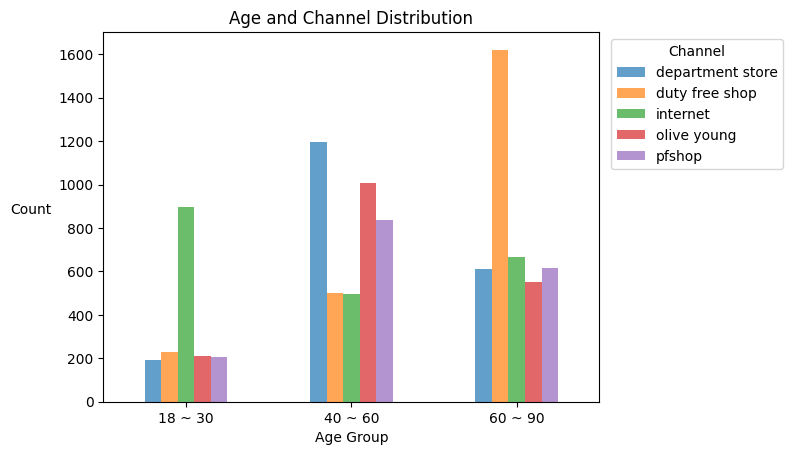

In [7]:
df['channel'] = df.channel.replace({1:'internet', 2:'olive young', 3:'pfshop',
                                    4:'department store', 5:'duty free shop'}) # 채널 열의 값 변경


df['age_group'] = pd.cut(df['age'], [0, 30, 60, 90], right = True, labels=['18 ~ 30', '40 ~ 60', '60 ~ 90']) # age 열의 값을 원하는 단위로 나누어 age_group 열 생성

age_channel_count = df.groupby(['age_group', 'channel']).size().reset_index(name ='count') # age_group 과 channel을 그룹화 하여 각 그룹의 데이터 수를 계산하여 데이터 프레임 형성
age_channel_count = age_channel_count.pivot(index = 'age_group', columns = 'channel', values = 'count')

age_channel_count.plot(kind = 'bar', stacked = False, alpha = 0.7)

plt.xlabel('Age Group') # x축 
plt.ylabel('Count') # y축 
plt.title('Age and Channel Distribution') # 제목
plt.legend(title = 'Channel', bbox_to_anchor = (1.01, 1.0), loc = 'upper left') # 그래프의 범례

plt.xticks(rotation = 360)
plt.ylabel('Count', rotation = 0, labelpad=20)

print(df.head(),'\n')
print(age_channel_count)

plt.show()

### 성별 별 제품 선호

pdt_22    11    22   33   44   55
gender                           
Man     1975   703  705  727  727
Woman    592  2535  616  592  659 

pdt_23   11   22    33   44   55
gender                          
Man     928  819  1319  930  841
Woman   740  713  2082  738  721


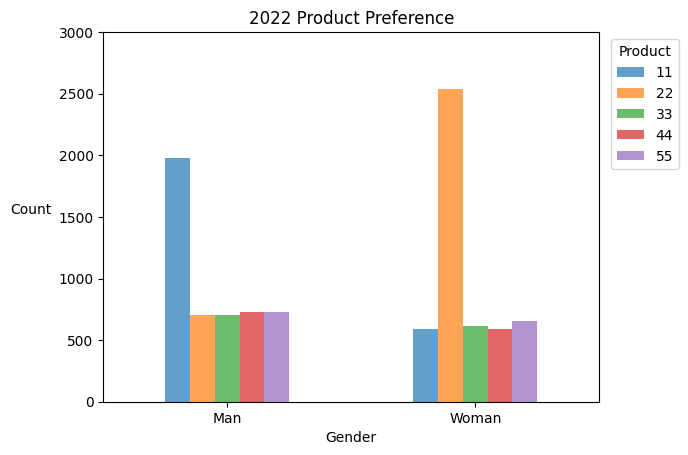

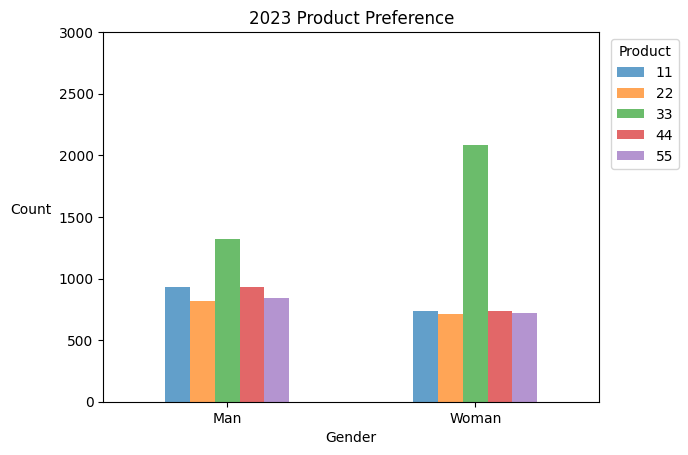

In [8]:
df['gender'] = df.gender.replace({0 : 'Man', 1 : 'Woman'})


gen_pref22 = df.groupby(['gender', 'pdt_22']).size().reset_index(name = 'count')

gen_pref1 = gen_pref22.pivot(index = 'gender', columns = 'pdt_22', values = 'count')
gen_pref22.pivot(index = 'gender', columns = 'pdt_22', values = 'count').plot(kind = 'bar', stacked = False, alpha = 0.7)

plt.title('2022 Product Preference')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.ylim(0, 3000)
plt.legend(title = 'Product', bbox_to_anchor = (1.01, 1), loc = 'upper left')

plt.xticks(rotation = 360)
plt.ylabel('Count', rotation = 0, labelpad=20)



gen_pref23 = df.groupby(['gender', 'pdt_23']).size().reset_index(name = 'count')

gen_pref2 = gen_pref23.pivot(index = 'gender', columns = 'pdt_23', values = 'count')
gen_pref23.pivot(index = 'gender', columns = 'pdt_23', values = 'count').plot(kind = 'bar', stacked = False, alpha = 0.7)

plt.title('2023 Product Preference')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.ylim(0, 3000)
plt.legend(title = 'Product', bbox_to_anchor = (1.01, 1), loc = 'upper left')

plt.xticks(rotation = 360)
plt.ylabel('Count', rotation = 0, labelpad=20)


print(gen_pref1,'\n')
print(gen_pref2)

plt.show()


pdt_23    11    22    33   44   55
gender                            
Man    -1047   116   614  203  114
Woman    148 -1822  1466  146   62


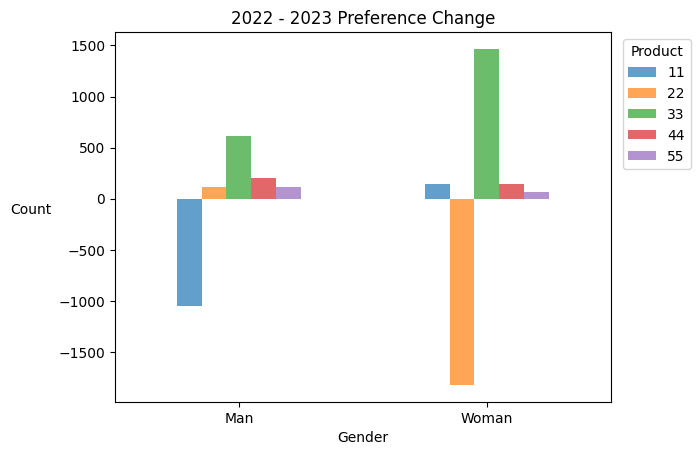

In [9]:
diff = gen_pref2 - gen_pref1

diff.plot(kind='bar', alpha = 0.7)

plt.title('2022 - 2023 Preference Change')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title = 'Product', bbox_to_anchor = (1.01, 1), loc = 'upper left')

plt.xticks(rotation = 360)
plt.ylabel('Count', rotation = 0, labelpad=20)

print(diff)
plt.show()

### 연도별 제품 구매

   pdt_22  pa_22  quantity
0      11   2000    128662
1      22   3000    163604
2      33   4000     67568
3      44   5000     67048
4      55   6000     71330 

   pdt_23  pa_23  quantity
0      11   4000     63217
1      22   6000     58595
2      33   2000    130328
3      44   3000    104750
4      55   8000     59592 



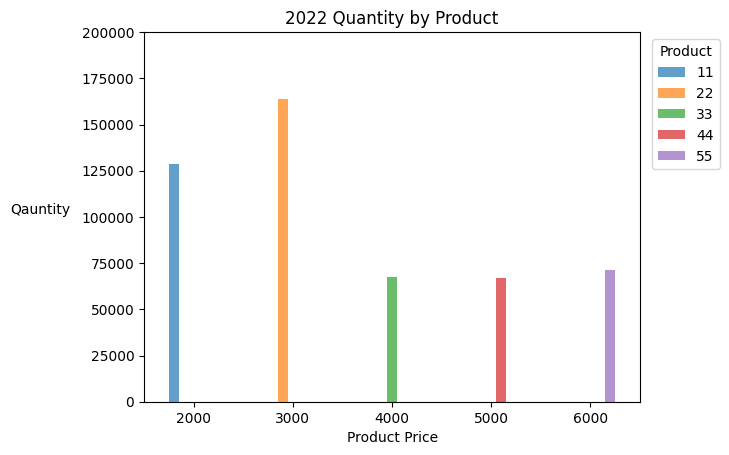

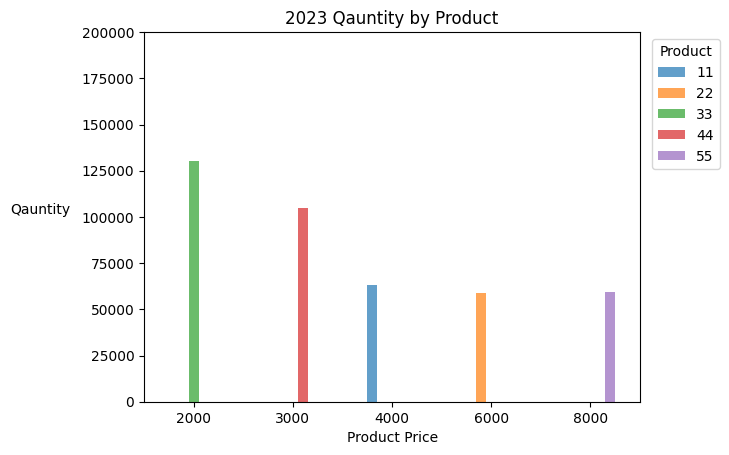

In [10]:
pa_q22 = df.groupby(['pdt_22',  'pa_22'])['q_22'].sum().reset_index(name = 'quantity')
pa_q1 = pa_q22.pivot(index = 'pa_22', columns = 'pdt_22', values = 'quantity')
pa_q22.pivot(index = 'pa_22', columns = 'pdt_22', values = 'quantity').plot(kind = 'bar', stacked = False, alpha = 0.7)


plt.title('2022 Quantity by Product')
plt.xlabel('Product Price')
plt.xticks(rotation = 360)
plt.ylabel('Qauntity', rotation = 0, labelpad=30)
plt.ylim(0, 200000)
plt.legend(title = 'Product', bbox_to_anchor = (1.01, 1), loc = 'upper left')


pa_q23 = df.groupby(['pdt_23', 'pa_23'])['q_23'].sum().reset_index(name = 'quantity')
pa_q2 = pa_q23.pivot(index = 'pa_23', columns = 'pdt_23', values = 'quantity')
pa_q23.pivot(index = 'pa_23', columns = 'pdt_23', values = 'quantity').plot(kind = 'bar', stacked = False, alpha = 0.7)

plt.title('2023 Qauntity by Product')
plt.xlabel('Product Price')
plt.xticks(rotation = 360)
plt.ylabel('Qauntity', rotation = 0, labelpad=30)
plt.ylim(0, 200000)
plt.legend(title = 'Product', bbox_to_anchor = (1.01, 1), loc = 'upper left')


print(pa_q22, '\n')
print(pa_q23, '\n')

plt.show()

   pdt_22  pa_22      total
0      11   2000  257324000
1      22   3000  490812000
2      33   4000  270272000
3      44   5000  335240000
4      55   6000  427980000 

   pdt_23  pa_23  pa_c      total    total_c
0      11   4000  2000  252868000   -4456000
1      22   6000  3000  351570000 -139242000
2      33   2000 -2000  260656000   -9616000
3      44   3000 -2000  314250000  -20990000
4      55   8000  2000  476736000   48756000


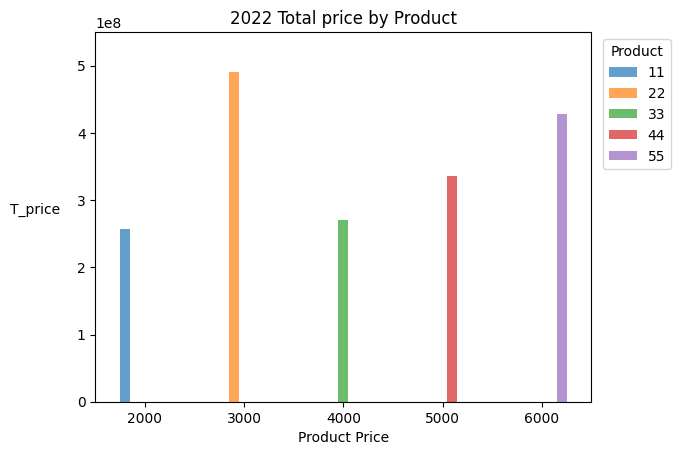

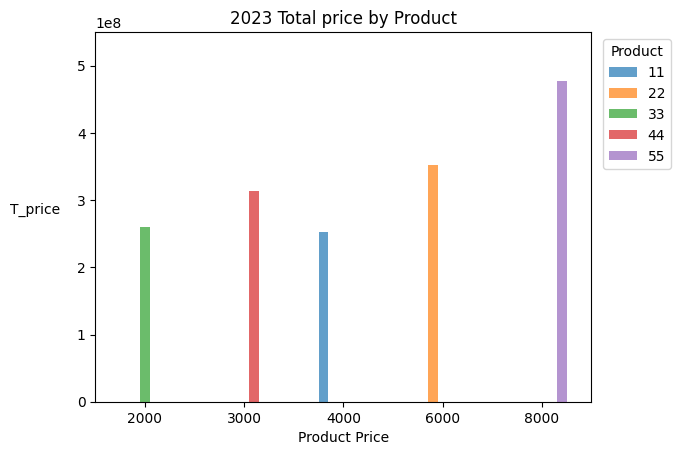

In [11]:
pa_pur22 = df.groupby(['pdt_22', 'pa_22'])['pur_22'].sum().reset_index(name = 'total')
pa_pur1 = pa_pur22.pivot(index = 'pa_22', columns = 'pdt_22', values = 'total')
pa_pur22.pivot(index = 'pa_22', columns = 'pdt_22', values = 'total').plot(kind = 'bar', stacked = False, alpha = 0.7)


plt.title('2022 Total price by Product')
plt.xlabel('Product Price')
plt.xticks(rotation = 360)
plt.ylabel('T_price', rotation = 0, labelpad=30)
plt.ylim(0, 550000000)
plt.legend(title = 'Product', bbox_to_anchor = (1.01, 1), loc = 'upper left')


pa_pur23 = df.groupby(['pdt_23', 'pa_23'])['pur_23'].sum().reset_index(name = 'total')
pa_pur2 = pa_pur23.pivot(index = 'pa_23', columns = 'pdt_23', values = 'total')
pa_pur23.pivot(index = 'pa_23', columns = 'pdt_23', values = 'total').plot(kind = 'bar', stacked = False, alpha = 0.7)


plt.title('2023 Total price by Product')
plt.xlabel('Product Price')
plt.xticks(rotation = 360)
plt.ylabel('T_price', rotation = 0, labelpad=30)
plt.ylim(0, 550000000)
plt.legend(title = 'Product', bbox_to_anchor = (1.01, 1), loc = 'upper left')

pa_pur23.insert(2, 'pa_c', pa_pur23['pa_23'] - pa_pur22['pa_22'])
pa_pur23['total_c'] = pa_pur23['total'] - pa_pur22['total']

print(pa_pur22, '\n')
print(pa_pur23)

plt.show()

In [12]:
a1 = df.groupby(['gender','pdt_22'])
a2 = a1.agg({'q_22' : 'sum', 'pur_22' : 'sum'})

b1 = df.groupby(['gender','pdt_23'])
b2 = b1.agg({'q_23' : 'sum', 'pur_23' : 'sum'})

a_t = a2['pur_22'].sum()
b_t = b2['pur_23'].sum()

b2.insert(1, 'q_c', b2['q_23'] - a2['q_22'])
b2['pur_c'] = b2['pur_23'] - a2['pur_22']

print(a2, '\n')
print(f'2022년도 총액 : {a_t}\n')

print(b2, '\n')
print(f'2023년도 총액 : {b_t}')

                 q_22     pur_22
gender pdt_22                   
Man    11       98887  197774000
       22       34456  103368000
       33       35664  142656000
       44       35959  179795000
       55       36884  221304000
Woman  11       29775   59550000
       22      129148  387444000
       33       31904  127616000
       44       31089  155445000
       55       34446  206676000 

2022년도 총액 : 1781628000

                q_23     q_c     pur_23      pur_c
gender pdt_23                                     
Man    11      34393  -64494  137572000  -60202000
       22      31730   -2726  190380000   87012000
       33      50075   14411  100150000  -42506000
       44      58551   22592  175653000   -4142000
       55      31291   -5593  250328000   29024000
Woman  11      28824    -951  115296000   55746000
       22      26865 -102283  161190000 -226254000
       33      80253   48349  160506000   32890000
       44      46199   15110  138597000  -16848000
       55      28

In [13]:
c1 = df.groupby(['pdt_22'])
c2 = c1.agg({'q_22' : 'sum', 'pur_22' : 'sum'})

d1 = df.groupby(['pdt_23'])
d2 = d1.agg({'q_23' : 'sum', 'pur_22' : 'sum', 'pur_23' : 'sum'})

d2.insert(0, 'q_22', c2['q_22'])
d2.insert(2, 'q_c', ((d2['q_23'] - c2['q_22']) / c2['q_22'] * 100).round(1).astype(str) + '%')
d2['pur_c'] = d2['pur_23'] - c2['pur_22']
d2['pur_cp'] = ((d2['pur_23'] - c2['pur_22']) / c2['pur_22'] * 100).round(1).astype(str) + '%'

print(c2)
d2

          q_22     pur_22
pdt_22                   
11      128662  257324000
22      163604  490812000
33       67568  270272000
44       67048  335240000
55       71330  427980000


,q_22,q_23,q_c,pur_22,pur_23,pur_c,pur_cp
pdt_23,,,,,,,
11,128662,63217,-50.9%,302209000,252868000,-4456000,-1.7%
22,163604,58595,-64.2%,273767000,351570000,-139242000,-28.4%
33,67568,130328,92.9%,615063000,260656000,-9616000,-3.6%
44,67048,104750,56.2%,306749000,314250000,-20990000,-6.3%
55,71330,59592,-16.5%,283840000,476736000,48756000,11.4%
